In [ ]:
import pandas as pd

#### 금천구에 있는 버스정류장을 대상으로 승하차인원수 시각화

In [ ]:
data1 = pd.read_csv('./금천구/금천.csv')
# 일단 필요없는 칼럼 제거
drop_cols = [
    'Unnamed: 0', '사용년월', '노선명', '표준버스정류장ID'
]
data1.drop(drop_cols, axis=1, inplace=True)

In [ ]:
data1 = data1[~data1['역명'].str.contains(r'\)$')]

- 중복행은 제거했고, 역명이 겹치는 것은 반대편에 있는 정류장이다.
- 따라서, groupby를 할때, 버스정류장ARS번호를 기준으로 하는 것이 좋겠다.

In [ ]:
data1.head(5)

,노선번호,버스정류장ARS번호,역명,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,자치구,퇴근시간대승차총승객수,퇴근시간대하차총승객수
0,150,18001,문성초등학교,517,183,635,306,362,160,221,103,금천구,1735,752
1,150,18002,문성초등학교,195,850,256,864,213,709,70,447,금천구,734,2870
2,150,18003,금천우체국,1231,190,1770,233,1135,164,681,134,금천구,4817,721
3,150,18004,금천우체국,386,912,423,1206,392,1061,219,650,금천구,1420,3829
4,150,18005,말미고개,377,107,459,137,217,104,132,75,금천구,1185,423


In [ ]:
data2 = data1.groupby('버스정류장ARS번호', as_index=False)[['17시승차총승객수', '17시하차총승객수', 
                       '18시승차총승객수', '18시하차총승객수', '19시승차총승객수', '19시하차총승객수',
                       '20시승차총승객수', '20시하차총승객수']].agg('sum')

In [ ]:
data2.head()

,버스정류장ARS번호,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수
0,18001,39017,37362,46484,45903,26995,25860,16681,16396
1,18002,50940,112393,58844,128448,41790,102818,24999,62842
2,18003,152947,62516,208066,66689,137305,47193,87602,33111
3,18004,84479,107696,105706,144274,85084,123175,59398,74540
4,18005,38576,33767,42061,35956,27406,23906,17216,18245


In [ ]:
temp = data1[['버스정류장ARS번호', '역명']]
# 역명을 붙이기 위해 merge
x = pd.merge(temp, data2, on='버스정류장ARS번호', how='inner')

In [ ]:
x = x.sort_values(by='버스정류장ARS번호', ascending=True).drop_duplicates(subset='버스정류장ARS번호')

In [ ]:
# 제대로 들어갔는지 확인
print(data2.shape ,x.shape)

(156, 9) (156, 10)


In [ ]:
x = x.reset_index()

In [ ]:
x.drop('index', axis=1, inplace=True)

In [ ]:
# 그냥 예쁘게 만들어주기 위함
x['temp1'] ='('
x['temp2'] = ')'

In [ ]:
x['버스정류장ARS번호'] = x['버스정류장ARS번호'].astype('str')

In [ ]:
x['정류소'] = x['역명'] + x['temp1'] + x['버스정류장ARS번호'] + x['temp2']

In [ ]:
drop_cols = ['temp1', 'temp2', '20시승차총승객수', '20시하차총승객수']
x.drop(drop_cols, axis=1, inplace=True)
x.head(10)

,버스정류장ARS번호,역명,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,정류소
0,18001,문성초등학교,39017,37362,46484,45903,26995,25860,문성초등학교(18001)
1,18002,문성초등학교,50940,112393,58844,128448,41790,102818,문성초등학교(18002)
2,18003,금천우체국,152947,62516,208066,66689,137305,47193,금천우체국(18003)
3,18004,금천우체국,84479,107696,105706,144274,85084,123175,금천우체국(18004)
4,18005,말미고개,38576,33767,42061,35956,27406,23906,말미고개(18005)
5,18006,말미고개,24847,77242,28357,116023,22221,105095,말미고개(18006)
6,18007,금천구청.금천경찰서,67703,27741,76035,32212,43497,22257,금천구청.금천경찰서(18007)
7,18008,금천구청.금천경찰서,25458,100077,32435,141586,26518,121380,금천구청.금천경찰서(18008)
8,18009,시흥사거리,86287,39739,94859,42294,62506,30840,시흥사거리(18009)
9,18010,시흥사거리,52843,92723,64288,123925,50644,111653,시흥사거리(18010)


In [ ]:
# 좌표값으로 시각화가 필요해 보인다. (왜냐하면, 전체 정류장의 갯수가 157개이기 때문에 모든 데이터를 보려면 시각화가 필요할듯싶다.)

In [ ]:
# 그래도, top_10을 기준으로 각 시간대별, 그리고 퇴근시간대별 총승차승객수와 총하차승객수를 기준으로 histplot을 그려볼 수 있을 듯하다.
# 먼저, 퇴근시간대 총승차승객수와 총하차승객수 칼럼을 추가하자.

In [ ]:
x['퇴근시간대승차총승객수'] = x['17시승차총승객수'] + x['18시승차총승객수'] + x['19시승차총승객수'] 
x['퇴근시간대하차총승객수'] = x['17시하차총승객수'] + x['18시하차총승객수'] + x['19시하차총승객수'] 

#### 시각화

In [ ]:
import pandas as pd
# diff()값 시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
plt.rcParams['font.family'] = 'Malgun Gothic'

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False # 마이너스 기호 깨짐 방지
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
x2 = x.copy()

In [ ]:
def show_plot(col1,col2,num):
    # top_num 추출
    c1 = x2.nlargest(num, col1)
    c2 = x2.nlargest(num, col2)
    # 해당 데이터프레임에서 그래프 그리기
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    sns.barplot(x='정류소', y=col1, data=c1)
    plt.xticks(rotation=90)
    plt.subplot(1, 2, 2)
    sns.barplot(x='정류소', y=col2, data=c2)
    plt.xticks(rotation=90)
    return plt.show()

#### Top10 17시

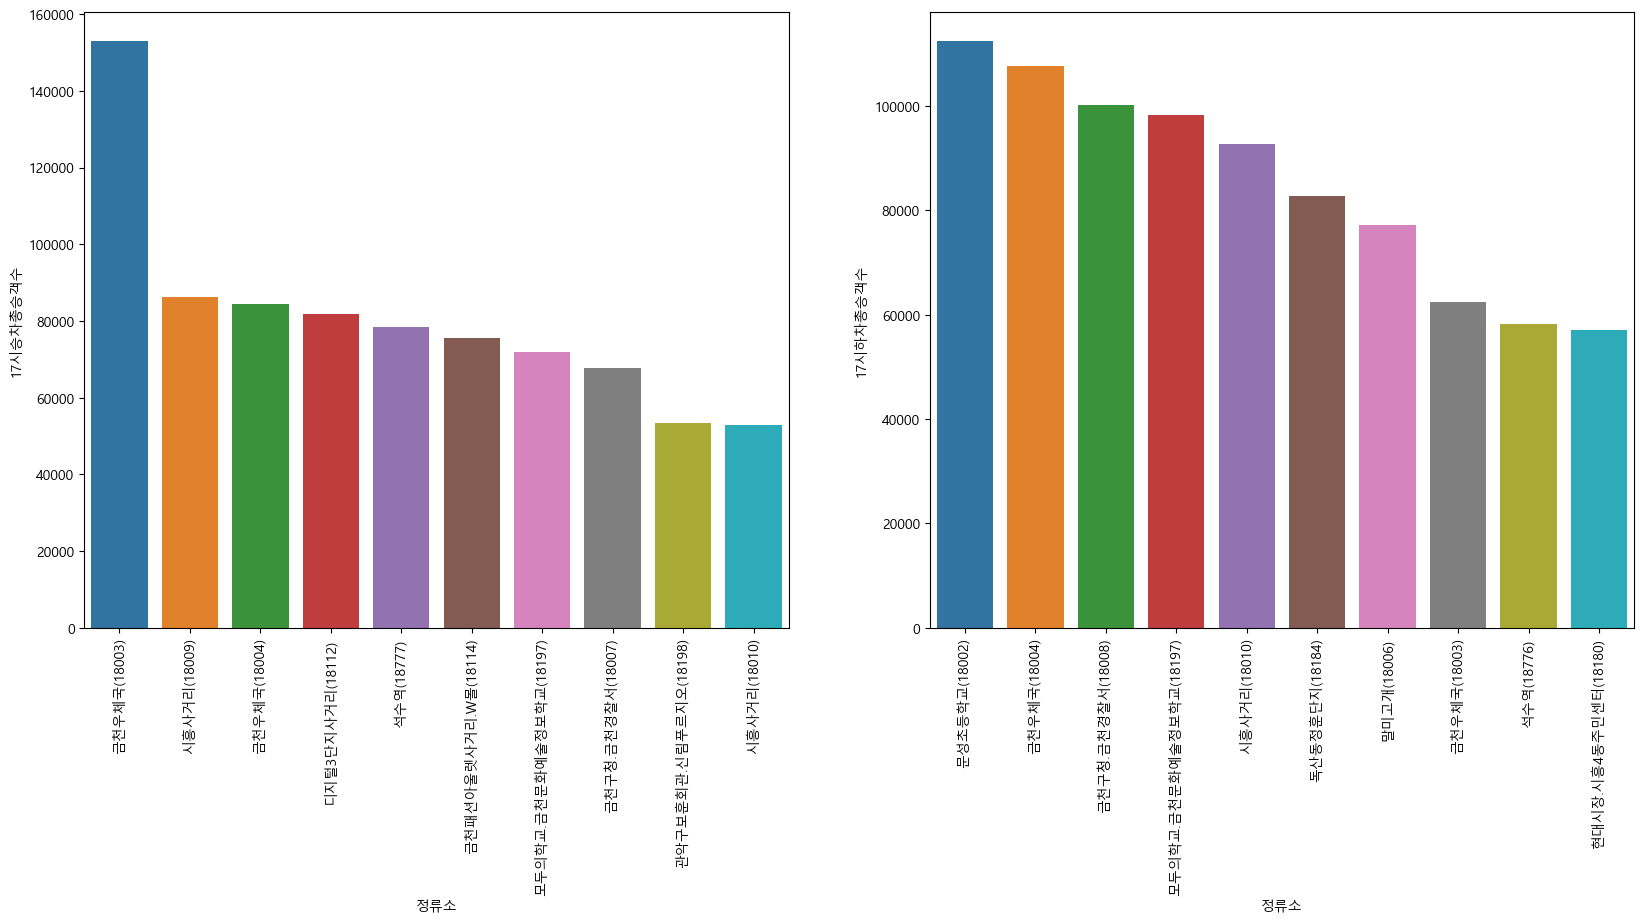

In [ ]:
show_plot('17시승차총승객수', '17시하차총승객수', 10)

#### Top10 18시 

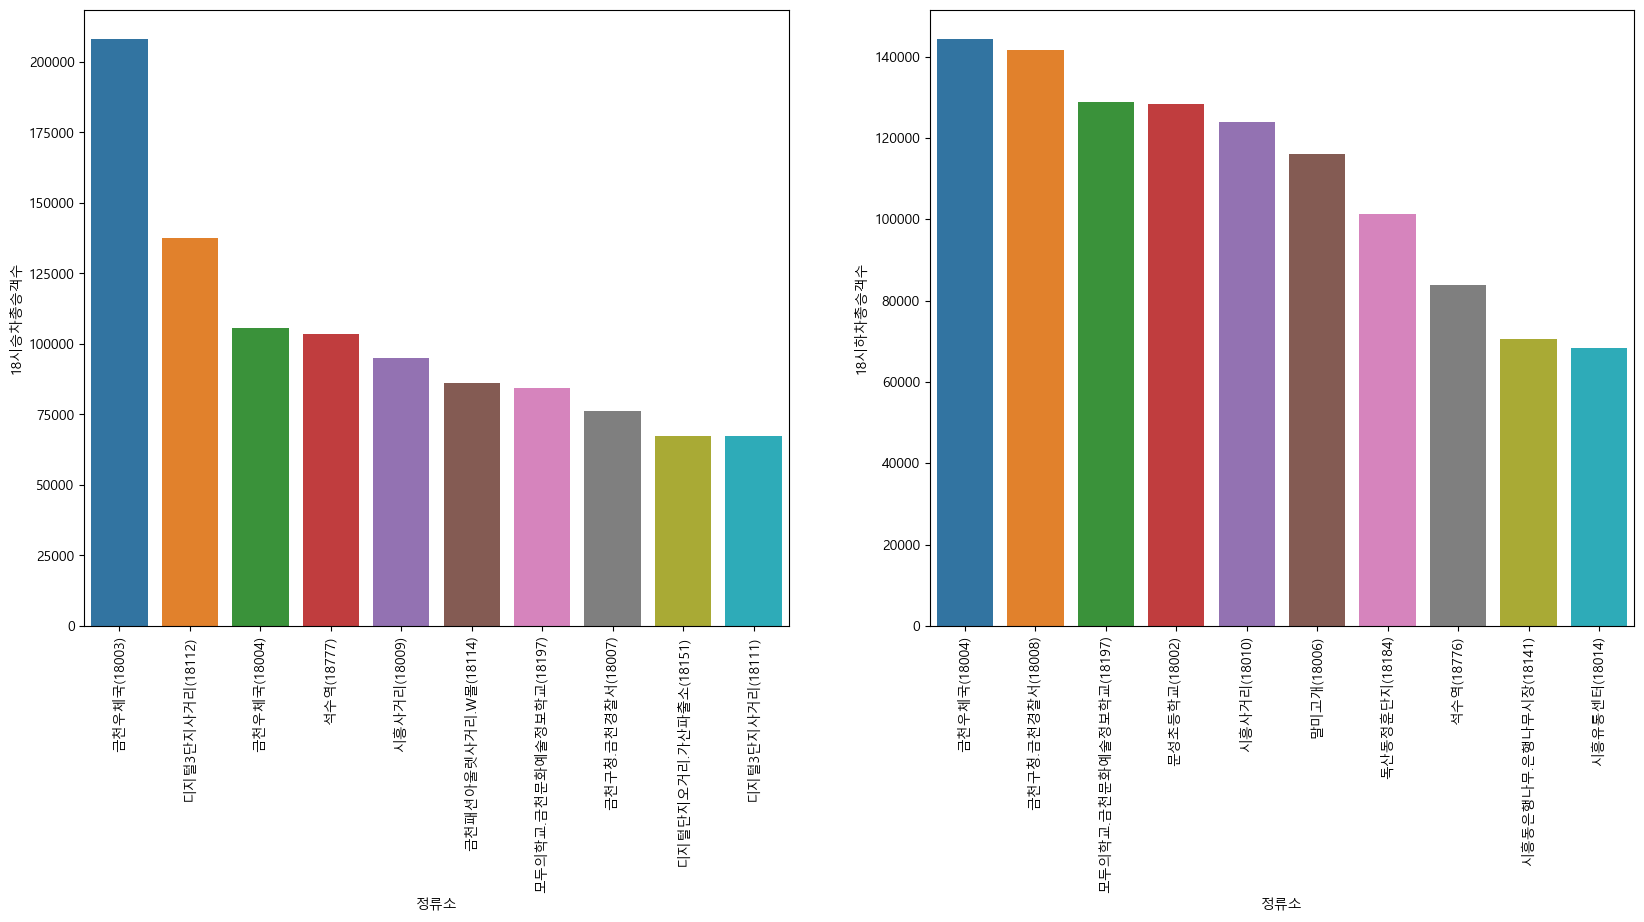

In [ ]:
show_plot('18시승차총승객수', '18시하차총승객수', 10)

#### Top10 19시

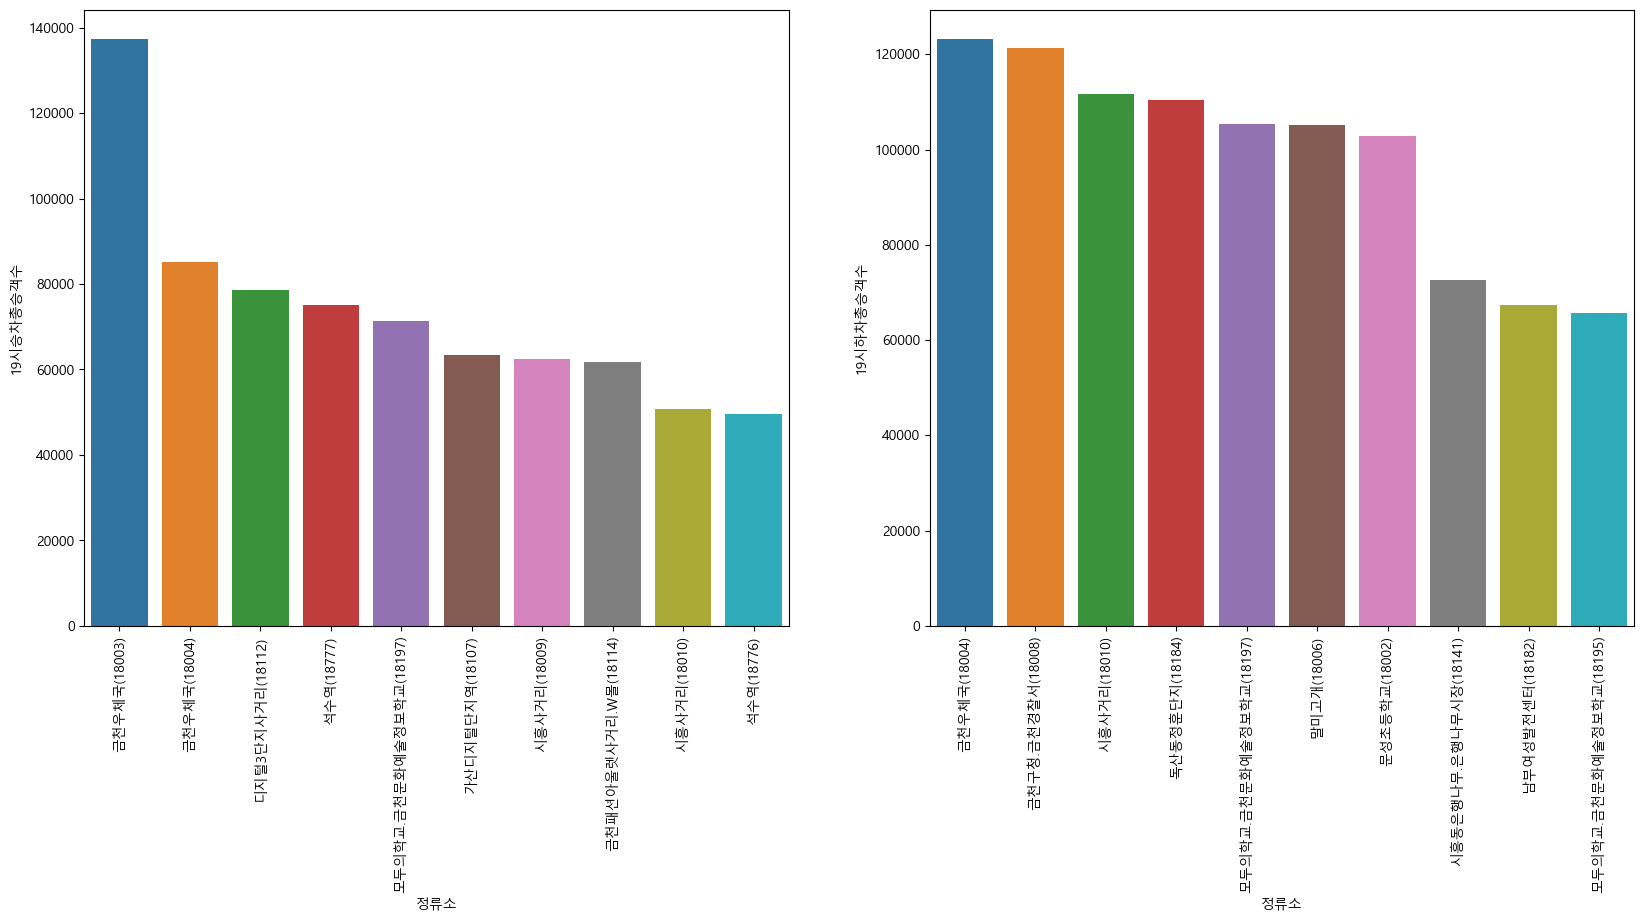

In [ ]:
show_plot('19시승차총승객수', '19시하차총승객수', 10)

#### Top10 퇴근시간대 전체

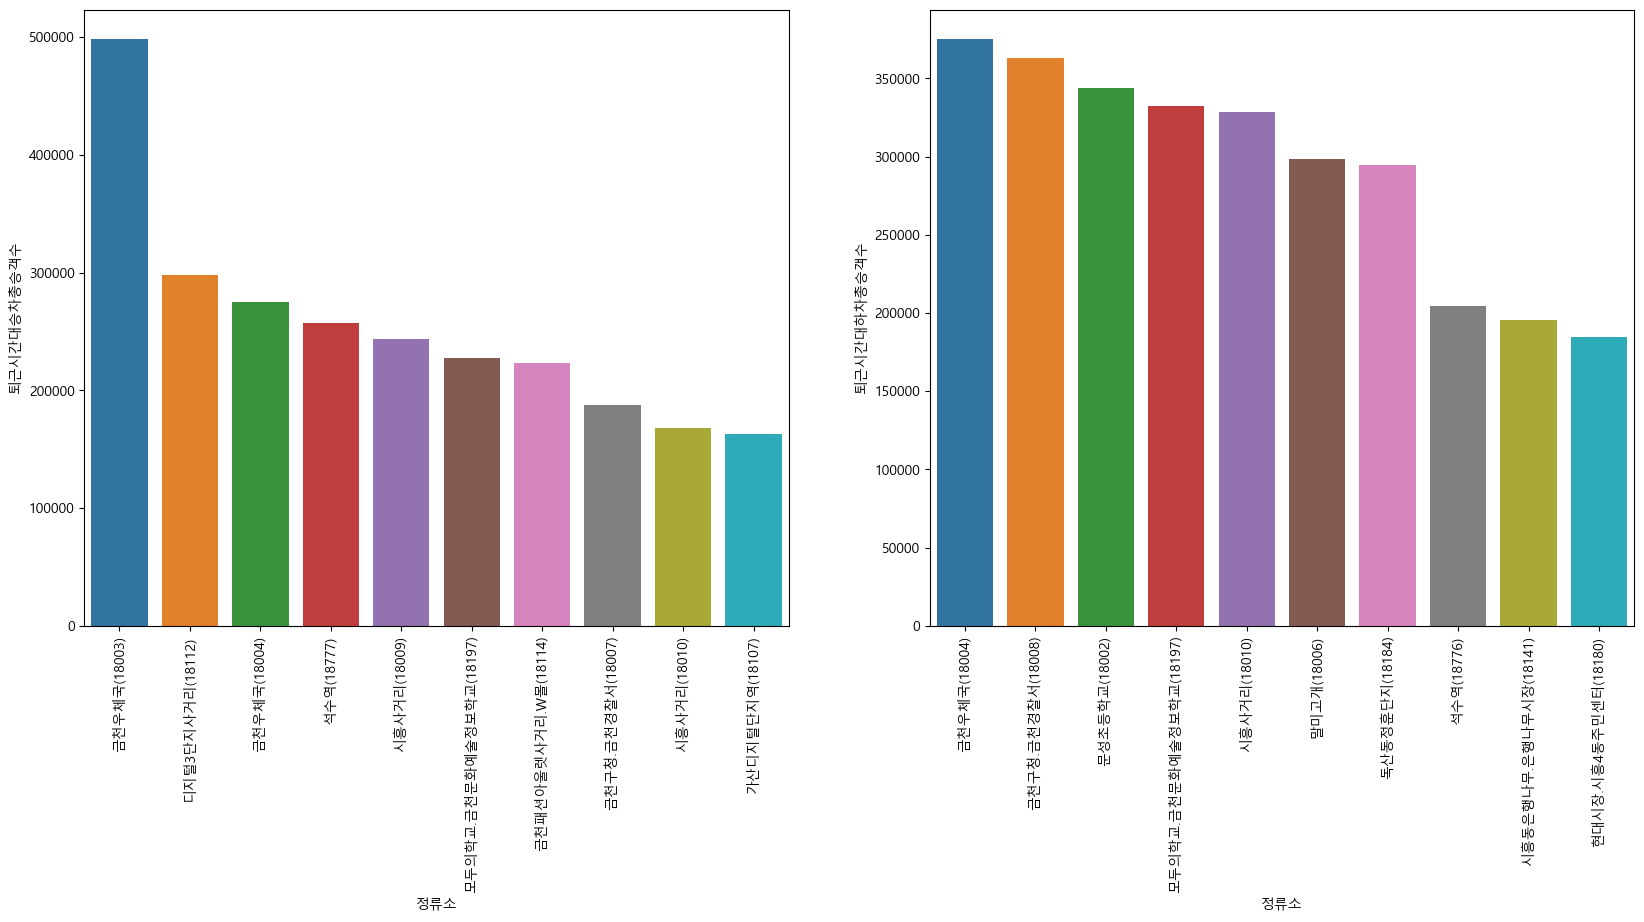

In [ ]:
show_plot('퇴근시간대승차총승객수', '퇴근시간대하차총승객수', 10)

In [ ]:
# 지도 시각화를 위해 위/경도 값 붙이기
x2.to_csv('./금천구/금천구_시각화.csv', index=False)

In [ ]:
a = pd.read_csv('./금천구/금천구_시각화.csv')
a.head(2)

,버스정류장ARS번호,역명,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,정류소,퇴근시간대승차총승객수,퇴근시간대하차총승객수
0,18001,문성초등학교,39017,37362,46484,45903,26995,25860,문성초등학교(18001),112496,109125
1,18002,문성초등학교,50940,112393,58844,128448,41790,102818,문성초등학교(18002),151574,343659


In [ ]:
loc = pd.read_excel('./서울시 버스정류소 좌표데이터(2023.03.10).xlsx')
loc.head(2)

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
0,100000001,1001,종로2가사거리,126.987750,37.569765
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183


In [ ]:
# 정류소좌표데이터 전처리

# 1. 정류소ID, 정류소명 drop
loc.drop(['NODE_ID', '정류소명'], axis=1, inplace=True)

# 2. X좌표, Y좌표 각각 longitude, latitude로 이름 변경, ARS-ID는 버스정류장ARS번호로 이름 변경
loc.rename(columns={
    'ARS_ID': '버스정류장ARS번호',
    'X좌표': 'longitude',
    'Y좌표': 'latitude'
}, inplace=True)


In [ ]:
display(loc.head(2))
print(loc.shape)

,버스정류장ARS번호,longitude,latitude
0,1001,126.987750,37.569765
1,1002,126.996566,37.579183


(12559, 3)


In [ ]:
print(a.shape)

(156, 11)


In [ ]:
# 버스정류장ARS번호를 기준으로 merge
fn = pd.merge(loc, a, on='버스정류장ARS번호', how='inner')

In [ ]:
display(fn.head(2))
print(fn.shape)

,버스정류장ARS번호,longitude,latitude,역명,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,정류소,퇴근시간대승차총승객수,퇴근시간대하차총승객수
0,18001,126.898666,37.475364,문성초등학교,39017,37362,46484,45903,26995,25860,문성초등학교(18001),112496,109125
1,18002,126.898330,37.474034,문성초등학교,50940,112393,58844,128448,41790,102818,문성초등학교(18002),151574,343659


(157, 13)


In [ ]:
# 중복행이 하나 생김 (버스정류장ARS번호를 기준으로 행 제거)
fn['버스정류장ARS번호'].nunique()

156

In [ ]:
fn = fn.drop_duplicates(subset='버스정류장ARS번호')
print(fn.shape)

(156, 13)


In [ ]:
fn.columns

Index(['버스정류장ARS번호', 'longitude', 'latitude', '역명', '17시승차총승객수', '17시하차총승객수',
       '18시승차총승객수', '18시하차총승객수', '19시승차총승객수', '19시하차총승객수', '정류소',
       '퇴근시간대승차총승객수', '퇴근시간대하차총승객수'],
      dtype='object')

In [ ]:
fn.head(2)

,버스정류장ARS번호,longitude,latitude,역명,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,정류소,퇴근시간대승차총승객수,퇴근시간대하차총승객수
0,18001,126.898666,37.475364,문성초등학교,39017,37362,46484,45903,26995,25860,문성초등학교(18001),112496,109125
1,18002,126.898330,37.474034,문성초등학교,50940,112393,58844,128448,41790,102818,문성초등학교(18002),151574,343659


In [ ]:
fn.to_csv('./금천구/final.csv', index=False)

In [ ]:
import geopandas as gpd
import pyproj

In [ ]:
from fiona.crs import from_epsg

In [ ]:
seoul = gpd.read_file('./test.shp')
# CRS: EPSG:5179

In [ ]:
seoul = seoul.to_crs(epsg=4326)

In [ ]:
seoul.head()

,si,gu,dong,geometry
0,서울시,종로구,청운동,"POLYGON ((126.97556 37.58968, 126.97549 37.589..."
1,서울시,종로구,신교동,"POLYGON ((126.97031 37.58418, 126.97033 37.584..."
2,서울시,종로구,궁정동,"POLYGON ((126.97400 37.58654, 126.97401 37.586..."
3,서울시,종로구,효자동,"POLYGON ((126.97356 37.58323, 126.97355 37.582..."
4,서울시,종로구,창성동,"POLYGON ((126.97353 37.58182, 126.97354 37.581..."


In [ ]:
# 금천구만 추출
seoul = seoul[seoul['gu'] == '금천구']

In [ ]:
import folium

In [ ]:
m = folium.Map(location=[37.58, 127.0], tiles='CartoDBpositron', zoom_start=12)

folium.Choropleth(
    geo_data = seoul['geometry'],
    fill_color = 'YlGnBu'
).add_to(m)

m

In [ ]:
from folium import Marker
for _, row in fn.iterrows():
    Marker(
        location=[row['latitude'], row['longitude']],
        popup = row['정류소'],
        icon = folium.Icon(color='purple', icon='star')
    ).add_to(m)
m

In [ ]:
# # 17시 top_10에 들어가는 지역
# c1 = fn.nlargest(10, "17시승차총승객수")
# c2 = fn.nlargest(10, "17시하차총승객수")
# 왜 안되냐 ㅠㅠ 흑흑

# for i in range(len(c2)):
#     if c2['정류소'].iat[i]:
#         color = 'darkblue'
    
    
        
        
        # if row[col] >= target:
        #     print(row[col])
        #     return 'darkred'
        # else:
        #     return 'green'
    # for i, row in fn.iterrows():
    #     if row[col] >= target:
    #         print(row[col])
    #         return 'darkblue'
    #     else:
    #         return 'darkred'
    
    # if c1['']:
    #     return 'darkred'
    # else:
    #     return 'green'
        
    
    
# basemap
m2 = folium.Map(locaton=[37.58, 127.0], tiles='CartoDBpositron', zoom_start=12)

for _, row in fn.iterrows():
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius = row['17시승차총승객수'] ** 0.5,
        color = 'white',
        fill_color = 'Red'
        # popup = row['정류소'],
        # icon = folium.Icon(color=color, icon='star')
    ).add_to(m2)
    
for _, row in fn.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup = row['정류소'],
        icon = folium.Icon(color='blue', icon='star')
    ).add_to(m2)
    

m2


In [ ]:
seoul.to_file('./금천구/gchg.shp', encoding='cp949')

In [ ]:
gpd.read_file('./금천구/gchg.shp')

,si,gu,dong,geometry
0,서울시,금천구,가산동,"POLYGON ((126.87456 37.48537, 126.87456 37.485..."
1,서울시,금천구,독산동,"POLYGON ((126.89899 37.47915, 126.89899 37.479..."
2,서울시,금천구,시흥동,"POLYGON ((126.91238 37.46588, 126.91255 37.465..."


In [ ]:
# keppler 시각화
